In [ ]:
#import libraries 
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

## 1. Unzip Test dataset

In [ ]:
!unzip "/content/drive/MyDrive/DS projects/CCRCC classification/Test.zip" -d "/content/Dataset"

In [ ]:
test_directory = '/content/Dataset/Test'
class_names = ['Blood', 'CCRCC', 'Fat', 'Kidney', 'Stroma']
test_data = tf.keras.preprocessing.image_dataset_from_directory(
    test_directory,
    labels="inferred",
    label_mode="categorical",
    class_names=class_names,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=False,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)

Found 107640 files belonging to 5 classes.


In [ ]:
# get True labels from the dataset
true_labels = list()
for _, y in test_data:
    for label in y:
        true_labels.append(np.argmax(label)) 

# 2. Evaluate models

### A) Inception V3

In [ ]:
# unzip model
!unzip "/content/drive/MyDrive/DS projects/CCRCC classification/Models/Inception V3/InceptionV3-20220315T081712Z-001.zip" -d "/content/InceptionV3"
inceptionv3 = tf.keras.models.load_model('/content/InceptionV3/InceptionV3')


In [ ]:
# get predictions of InceptionV3 model
result = inceptionv3.predict(test_data)
inceptionv3_pred = np.concatenate([np.argmax(result, axis = -1)]) # predictions labels

In [ ]:
inceptionv3.evaluate(test_data)

3364/3364 [==============================] - 346s 102ms/step - loss: 0.6850 - accuracy: 0.8344 - ROC_AUC: 0.9650 - PR_AUC: 0.8977 - precision_2: 0.8405 - recall_2: 0.8293


[0.6850120425224304,
 0.8344202637672424,
 0.9650037884712219,
 0.8977055549621582,
 0.8405461311340332,
 0.8293013572692871]

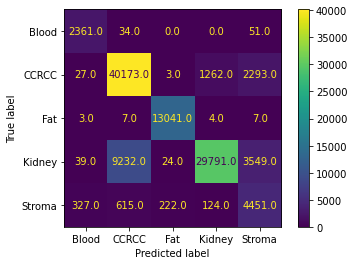

<Figure size 432x288 with 0 Axes>

In [ ]:
ConfusionMatrixDisplay.from_predictions(true_labels, inceptionv3_pred, display_labels = class_names,include_values = True, values_format = '.1f' )
plt.show()

### B) EfficientV2S

In [ ]:
# unzip model
!unzip "/content/drive/MyDrive/DS projects/CCRCC classification/Models/EfficientV3S/EfficientNetV2S-20220318T103210Z-001.zip" -d "/content/EfficientV2S"
efficientv2s = tf.keras.models.load_model('/content/EfficientV2S/EfficientNetV2S')


In [ ]:
# get predictions of EfficientV2S model
result = efficientv2s.predict(test_data)
efficientv2s_pred = np.concatenate([np.argmax(result, axis = -1)]) # predictions labels

In [ ]:
efficientv2s.evaluate(test_data)

3364/3364 [==============================] - 602s 177ms/step - loss: 0.3971 - accuracy: 0.9071 - ROC_AUC: 0.9834 - PR_AUC: 0.9182 - precision: 0.9107 - recall: 0.9038


[0.39708465337753296,
 0.9070791602134705,
 0.9834267497062683,
 0.9182141423225403,
 0.9107470512390137,
 0.9038090109825134]

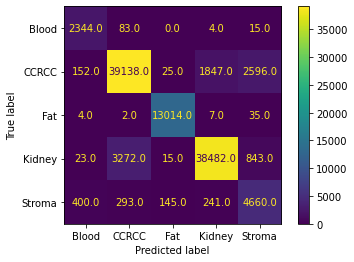

<Figure size 432x288 with 0 Axes>

In [ ]:
ConfusionMatrixDisplay.from_predictions(true_labels, efficientv2s_pred, display_labels = class_names,include_values = True, values_format = '.1f' )
plt.show()

### C) ResNet101V2

In [ ]:
# unzip model
!unzip "/content/drive/MyDrive/DS projects/CCRCC classification/Models/RESNET101/ResNet101V2-20220416T165116Z-001.zip" -d "/content/ResNet101V2"
resnet101 = tf.keras.models.load_model('/content/ResNet101V2/ResNet101V2')

In [ ]:
# get predictions of EfficientV2S model
result = resnet152.predict(test_data)
resnet101_pred = np.concatenate([np.argmax(result, axis = -1)]) # predictions labels

In [ ]:
resnet101.evaluate(test_data)

3364/3364 [==============================] - 764s 226ms/step - loss: 0.2264 - accuracy: 0.9392 - ROC_AUC: 0.9874 - PR_AUC: 0.9260 - precision: 0.9419 - recall: 0.9367


[0.22641241550445557,
 0.9391676187515259,
 0.9874125719070435,
 0.9260002374649048,
 0.9419364929199219,
 0.9366685152053833]

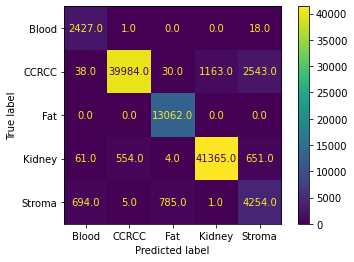

<Figure size 432x288 with 0 Axes>

In [ ]:
ConfusionMatrixDisplay.from_predictions(true_labels, resnet101_pred, display_labels = class_names,include_values = True, values_format = '.1f' )
plt.show()